## Importing Libraries

In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

There is a image dataset called MNIST contain information of image in form of matrics. Calclation of metrics I do'nt know now but for each pixel they assign a information!.So our end goal is to build a ANN that can predict the number between 0 and 9 based on feature of image 
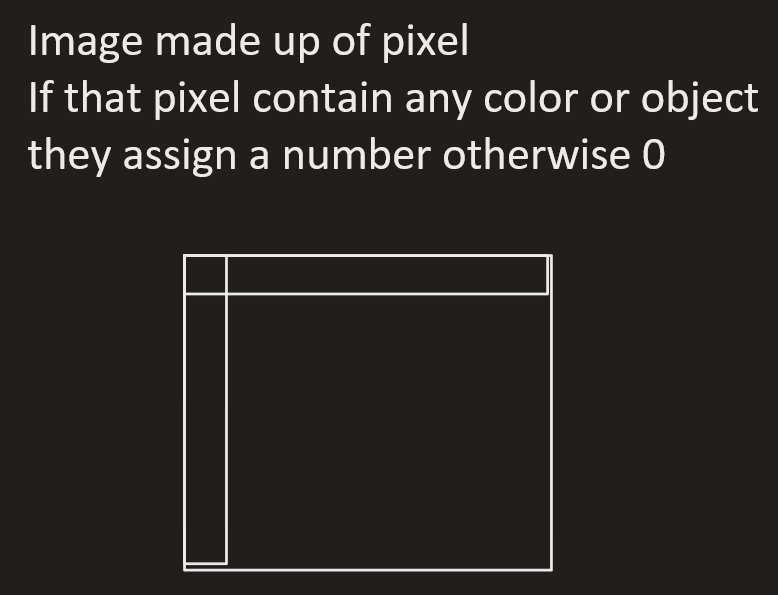

## Loading dataset from keras 

In [17]:
data=keras.datasets.mnist.load_data()

In [19]:
(xtrain,ytrain),(xtest,ytest)=data

In [20]:
xtrain.shape
#contains 60000 images data in form of array. Each image are in size 
# of 28(r) X 28(c) pixel = 784 pixel(Total). 

(60000, 28, 28)

In [25]:
pd.DataFrame(xtrain[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


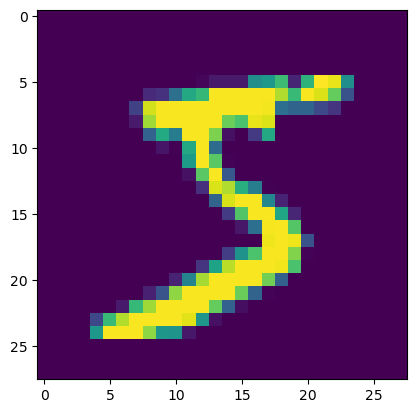

In [26]:
plt.imshow(xtrain[0])

Usually working with ANN we have to scale the values between 0 and 1

In [27]:
xtrain=xtrain/255
xtest=xtest/255

In [28]:
pd.DataFrame(xtrain[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.070588,0.070588,0.070588,0.494118,0.533333,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,0.368627,0.603922,0.666667,0.992157,0.992157,0.992157,0.992157,0.992157,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.984314,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,0.992157,0.992157,0.992157,0.992157,0.776471,0.713725,0.968627,0.945098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313725,0.611765,0.419608,0.992157,0.992157,0.803922,0.043137,0.000000,0.168627,0.603922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


## Building Artifical Neural Network

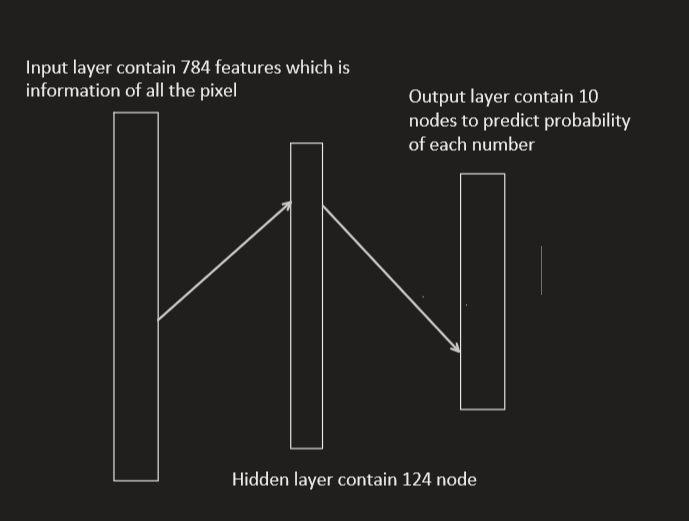

In [29]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax')) #for multiclass classification

In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
history=model.fit(xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2896 - accuracy: 0.9180 - val_loss: 0.1756 - val_accuracy: 0.9503
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1267 - accuracy: 0.9627 - val_loss: 0.1197 - val_accuracy: 0.9654
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0875 - accuracy: 0.9741 - val_loss: 0.1090 - val_accuracy: 0.9687
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0656 - accuracy: 0.9805 - val_loss: 0.1001 - val_accuracy: 0.9711
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0504 - accuracy: 0.9849 - val_loss: 0.0938 - val_accuracy: 0.9724
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0915 - val_accuracy: 0.9733
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0994 - val_accuracy:

## Prediction

In [33]:
y_prob=model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [35]:
y_pred=y_prob.argmax(axis=1)

In [36]:
from sklearn.metrics import accuracy_score,classification_report

In [38]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



## Model tunning

In [ ]:
#epochs can be changed to 100 for further accuracy